In [ ]:
!pip install yfinance
import pandas_datareader as web
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

     |████████████████████████████████| 6.3 MB 6.3 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

In [ ]:
BTC = pdr.get_data_yahoo("BTC-USD", start="2014-01-01", end="2021-10-31")
ETH = pdr.get_data_yahoo("ETH-USD", start="2014-01-01", end="2021-10-31")
DOGE = pdr.get_data_yahoo("DOGE-USD", start="2014-01-01", end="2021-10-31")
SP5 = pdr.get_data_yahoo("^GSPC", start="2014-01-01", end="2021-10-31")
BTC.reset_index(level=0, inplace=True)
ETH.reset_index(level=0, inplace=True)
DOGE.reset_index(level=0, inplace=True)
SP5.reset_index(level=0, inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
Merged = SP5.merge(ETH, how = 'outer', on = "Date")
Merged = Merged.merge(DOGE, how = 'outer', on = "Date")
Merged = Merged.merge(BTC, how = 'outer', on = "Date")

In [ ]:
Merged.columns = ["Date","Open_SP5",	'High_SP5'	,'Low_SP5',	'Close_SP5',	'Adj_Close_SP5','Volume_SP5',"Open_ETH",	'High_ETH'	,'Low_ETH',	'Close_ETH',	'Adj_Close_ETH','Volume_ETH',"Open_DOGE",	'High_DOGE'	,'Low_DOGE',	'Close_DOGE',	'Adj_Close_DOGE','Volume_BTC',"Open_BTC",	'High_BTC'	,'Low_BTC',	'Close_BTC',	'Adj_Close_BTC','Volume_BTC']

In [ ]:
BTC2=BTC.copy()
ETH2=ETH.copy()
DOGE2=DOGE.copy()
SP52=SP5.copy()

BTC2['asset']='BTC'
ETH2['asset']='ETH'
DOGE2['asset']='DOGE'
SP52['asset']='SP5'

In [ ]:
Merged2 = SP52.append(ETH2, ignore_index=True)
Merged2 = Merged2.append(DOGE2, ignore_index=True)
Merged2=Merged2.append(BTC2, ignore_index=True)

In [ ]:
Merged2['delta']=(Merged2['Close']-Merged2['Open'])/Merged2['Open']
piv_m2= Merged2.pivot(index='Date', columns='asset',values='delta')

In [ ]:
c1_col=['Adj_Close_SP5','Adj_Close_ETH','Adj_Close_DOGE','Adj_Close_BTC']

c1=Merged[c1_col]

In [ ]:
#SP5["pctChange"] = (SP5["Adj Close"].pct_change())*100

In [ ]:
#SP5["Weekday"] = SP5["Date"].dt.day_name()

In [ ]:
#SP5Weekly = SP5.loc[SP5["Weekday"]=="Monday"]


In [ ]:
def WeeklyOutputs(data):
  data["Weekday"] = data["Date"].dt.day_name()
  weekly = data.loc[data["Weekday"]=="Monday"]
  weekly["change"] = (weekly["Adj Close"].pct_change())*100
  weekly.drop(["High","Low","Close","Volume","Weekday"], axis=1, inplace = True)
  return(weekly)

In [ ]:
SP5Weekly = WeeklyOutputs(SP5)
BTCWeekly = WeeklyOutputs(BTC)
DOGEWeekly = WeeklyOutputs(DOGE)
ETHWeekly = WeeklyOutputs(ETH)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
stdSP5_W = SP5Weekly['change'].std()
stdBTC_W = BTCWeekly['change'].std()
stdDOGE_W = DOGEWeekly['change'].std()
stdETH_W = ETHWeekly['change'].std()

In [ ]:
def findBIGDROPS(data,stdDev):
  boundary = -2*stdDev
  drops = data.loc[data["change"] < boundary]
  dates = drops["Date"].tolist()
  return(drops,dates)

In [ ]:
SP5drops,SP5Dates = findBIGDROPS(SP5Weekly,stdSP5_W)

In [ ]:
def nextTwoWeeks(dates):
  newdates = []
  for x in dates:
    newdates.append(x)
    newdates.append(x+dt.timedelta(days=7))
    newdates.append(x+dt.timedelta(days=14))
  newBTC = BTCWeekly[BTCWeekly["Date"].isin(newdates)]
  newDOGE = DOGEWeekly[DOGEWeekly["Date"].isin(newdates)]
  newETH = ETHWeekly[ETHWeekly["Date"].isin(newdates)]
  newSP5 = SP5Weekly[SP5Weekly["Date"].isin(newdates)]
  final = newBTC.merge(newDOGE, on = "Date", how = "outer")
  final = final.merge(newETH, on = "Date", how = "outer")
  final = final.merge(newSP5, on = "Date", how = "outer")
  final.columns = ["Date","Open_BTC",'Adj_Close_BTC',"Change_BTC","Open_DOGE",'Adj_Close_DOGE', "Change_DOGE","Open_ETH",'Adj_Close_ETH',"Change_ETH","Open_SP5",	"Adj_Close_SP5", "Change_SP5"]
  return(final)


In [ ]:
dfDrops = nextTwoWeeks(SP5Dates)

In [ ]:
changeDfDrops = dfDrops[["Change_BTC","Change_DOGE", "Change_ETH", "Change_SP5"]]
changeDfDrops.corr()

,Change_BTC,Change_DOGE,Change_ETH,Change_SP5
Change_BTC,1.000000,0.857339,0.844629,0.292596
Change_DOGE,0.857339,1.000000,0.694461,0.279397
Change_ETH,0.844629,0.694461,1.000000,0.223441
Change_SP5,0.292596,0.279397,0.223441,1.000000


In [ ]:
dfDrops2020 = dfDrops.loc[dfDrops["Date"]> "2020-01-01"]
changeDfDrops2020 = dfDrops2020[["Change_BTC","Change_DOGE", "Change_ETH", "Change_SP5"]]
changeDfDrops2020.corr()

,Change_BTC,Change_DOGE,Change_ETH,Change_SP5
Change_BTC,1.000000,0.982913,0.959004,0.363770
Change_DOGE,0.982913,1.000000,0.967444,0.448847
Change_ETH,0.959004,0.967444,1.000000,0.419643
Change_SP5,0.363770,0.448847,0.419643,1.000000


In [ ]:
 dfDrops2020

,Date,Open_BTC,Adj_Close_BTC,Change_BTC,Open_DOGE,Adj_Close_DOGE,Change_DOGE,Open_ETH,Adj_Close_ETH,Change_ETH,Open_SP5,Adj_Close_SP5,Change_SP5
14,2020-03-09,8111.146484,7923.644531,-10.665847,0.002189,0.002214,-5.747121,201.318497,201.986328,-12.396876,2863.889893,2746.560059,-11.121176
15,2020-03-16,5385.229492,5014.479980,-36.714981,0.001684,0.001587,-28.319787,124.996117,110.605873,-45.240911,2508.590088,2386.129883,-13.122967
16,2020-03-23,5831.374512,6416.314941,27.955740,0.001727,0.001805,13.736612,123.365982,134.911606,21.975083,2290.709961,2237.399902,-6.233105
17,2020-03-30,5925.538574,6429.841797,0.210820,0.001723,0.001831,1.440441,125.577896,132.904541,-1.487689,2558.979980,2626.649902,17.397426
18,2020-04-06,6788.049805,7271.781250,13.094248,0.001866,0.001980,8.137628,143.608215,169.135880,27.261174,2578.280029,2663.679932,1.409782
19,2020-06-15,9386.035156,9450.702148,-3.282889,0.002510,0.002479,-4.063463,234.058304,229.928909,-6.650563,2993.760010,3066.590088,-5.129326
20,2020-06-22,9300.915039,9648.717773,2.095248,0.002447,0.002474,-0.201696,229.003372,242.533188,5.481815,3094.419922,3117.860107,1.671890
21,2020-06-29,9140.029297,9190.854492,-4.745328,0.002326,0.002313,-6.507682,225.361435,228.194870,-5.911899,3018.590088,3053.239990,-2.072579


In [ ]:
SP5WeeklyReg = SP5Weekly[["Date","change"]]
SP5WeeklyReg.columns = ["Date", "change_SP5"]

BTCWeeklyReg = BTCWeekly[["Date","change"]]
BTCWeeklyReg.columns = ["Date", "change_BTC"]

DOGEWeeklyReg = DOGEWeekly[["Date","change"]]
DOGEWeeklyReg.columns =  ["Date", "change_DOGE"]

ETHWeeklyReg = ETHWeekly[["Date","change"]]
ETHWeeklyReg.columns = ["Date", "change_ETH"]

In [ ]:
RegMerged = SP5WeeklyReg.merge(BTCWeeklyReg, how = "inner", on="Date")
RegMerged = RegMerged.merge(DOGEWeeklyReg, how = "inner", on="Date")
RegMerged = RegMerged.merge(ETHWeeklyReg, how = "inner", on = "Date")

In [ ]:
RegMerged.dropna(inplace = True)

In [ ]:
RegMerged.corr()

,change_SP5,change_BTC,change_DOGE,change_ETH
change_SP5,1.000000,0.145483,0.042279,0.092338
change_BTC,0.145483,1.000000,0.277259,0.509783
change_DOGE,0.042279,0.277259,1.000000,0.306248
change_ETH,0.092338,0.509783,0.306248,1.000000


In [ ]:
# First Regression Model, SP5 based on Cryptos
X = RegMerged[["change_DOGE","change_ETH","change_BTC"]]
Y = RegMerged[["change_SP5"]]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(pd.DataFrame(X_train),pd.DataFrame(Y_train))

LinearRegression()

In [ ]:
print(reg.coef_)
print(reg.intercept_)

[[-0.0008819   0.00648681  0.02056507]]
[0.12944062]


In [ ]:
pred = reg.predict(X_test)
err = pd.Series(Y_test["change_SP5"]) - [p[0]for p in pred]

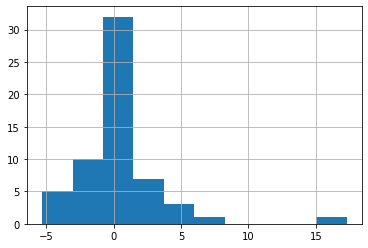

In [ ]:
err.hist()

In [ ]:
reg.score(X_test,Y_test)

0.017977304859418508

In [ ]:
len(X_train["change_BTC"])

233

In [ ]:
# model is a poor predictor, lets predicting a crypto based on the others

In [ ]:
X = RegMerged[["change_DOGE","change_ETH","change_SP5"]]
Y = RegMerged[["change_BTC"]]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(pd.DataFrame(X_train),pd.DataFrame(Y_train))
print(reg.coef_)
print(reg.intercept_)

[[0.02615726 0.29068342 0.3858231 ]]
[0.7649734]


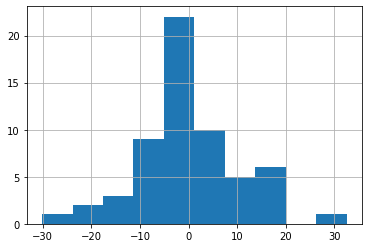

In [ ]:
pred = reg.predict(X_test)
err = pd.Series(Y_test["change_BTC"]) - [p[0]for p in pred]
err.hist()

In [ ]:
reg.score(X_test,Y_test)

0.19010090593854656

In [ ]:
# Still scores really poorly, lets go again but with no SP5
X = RegMerged[["change_DOGE","change_ETH"]]
Y = RegMerged[["change_BTC"]]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(pd.DataFrame(X_train),pd.DataFrame(Y_train))
print(reg.coef_)
print(reg.intercept_)

[[0.02694926 0.28004062]]
[1.03180678]


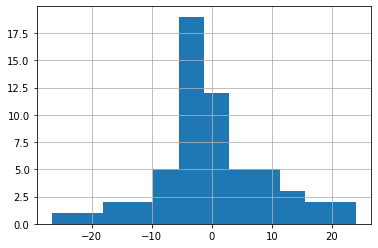

In [ ]:
pred = reg.predict(X_test)
err = pd.Series(Y_test["change_BTC"]) - [p[0]for p in pred]
err.hist(bins = 12)

In [ ]:
reg.score(X_test,Y_test)

0.3657034360720922

In [ ]:
#We do better with only cryptos, lets try to bring some more in
LTC = pdr.get_data_yahoo("LTC-USD", start="2014-01-01", end="2021-10-31")
XLM = pdr.get_data_yahoo("XLM-USD", start="2014-01-01", end="2021-10-31")
BNB = pdr.get_data_yahoo("BNB-USD", start="2014-01-01", end="2021-10-31")
LTC.reset_index(level=0, inplace=True)
XLM.reset_index(level=0, inplace=True)
BNB.reset_index(level=0, inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
LTCWeekly = WeeklyOutputs(LTC)
XLMWeekly = WeeklyOutputs(XLM)
BNBWeekly = WeeklyOutputs(BNB)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
LTCWeeklyReg = LTCWeekly[["Date","change"]]
XLMWeeklyReg = XLMWeekly[["Date","change"]]
BNBWeeklyReg = BNBWeekly[["Date","change"]]

LTCWeeklyReg.columns = ["Date", "change_LTC"]
XLMWeeklyReg.columns = ["Date", "change_XLM"]
BNBWeeklyReg.columns = ["Date", "change_BNB"]

In [ ]:
RegMerged = RegMerged.merge(LTCWeeklyReg, how = "inner", on = "Date")
RegMerged = RegMerged.merge(XLMWeeklyReg, how = "inner", on = "Date")
RegMerged = RegMerged.merge(BNBWeeklyReg, how = "inner", on = "Date")
RegMerged.dropna(inplace = True)

In [ ]:
RegMerged.corr()

,change_SP5,change_BTC,change_DOGE,change_ETH,change_LTC,change_XLM,change_BNB
change_SP5,1.000000,0.141288,0.051327,0.171294,0.179173,0.160928,0.018132
change_BTC,0.141288,1.000000,0.224524,0.734576,0.757891,0.583561,0.314963
change_DOGE,0.051327,0.224524,1.000000,0.311273,0.292005,0.257704,0.063617
change_ETH,0.171294,0.734576,0.311273,1.000000,0.739119,0.646297,0.256351
change_LTC,0.179173,0.757891,0.292005,0.739119,1.000000,0.630974,0.171976
change_XLM,0.160928,0.583561,0.257704,0.646297,0.630974,1.000000,0.091042
change_BNB,0.018132,0.314963,0.063617,0.256351,0.171976,0.091042,1.000000


In [ ]:
X = RegMerged[["change_DOGE","change_ETH","change_LTC","change_XLM", "change_BNB"]]
Y = RegMerged[["change_BTC"]]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(pd.DataFrame(X_train),pd.DataFrame(Y_train))
print(reg.coef_)
print(reg.intercept_)

[[-0.0171627   0.2397924   0.36079771  0.0204908   0.02891748]]
[1.11596106]


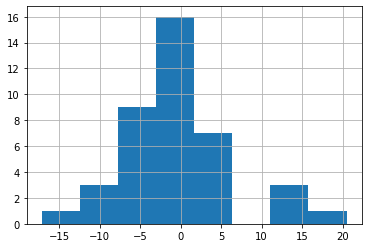

In [ ]:
pred = reg.predict(X_test)
err = pd.Series(Y_test["change_BTC"]) - [p[0]for p in pred]
err.hist(bins = 8)

Text(0.5, 1.0, 'Errors Hist')

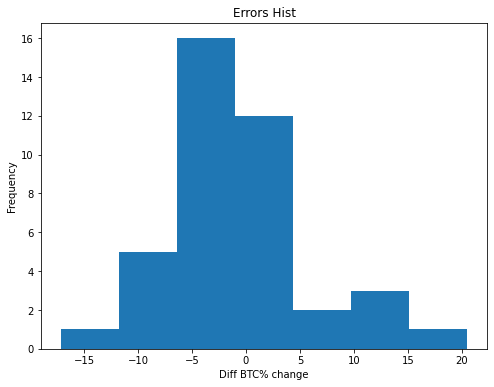

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.hist(err, label = "Errors", bins = 7)


plt.xlabel("Diff BTC% change")
plt.ylabel("Frequency")
plt.title("Errors Hist")

In [ ]:
reg.score(X_test,Y_test)

0.6841257236291196

This Model works pretty well

DV -> change_BTC

IVs -> ["change_DOGE","change_ETH","change_LTC","change_XLM", "change_BNB"]

coef, int = [0.00749273 0.20777219 0.34508473 0.03353905 0.03029037]  [0.61363843]

R2 = 0.7091436168580117

In [ ]:
len(Y_train["change_BTC"])

160

In [ ]:
RegMerged

,Date,change_SP5,change_BTC,change_DOGE,change_ETH,change_LTC,change_XLM,change_BNB
1,2017-08-07,0.429497,17.514445,13.445868,32.034468,6.444971,37.899975,42.779855
2,2017-08-14,-0.607431,28.002568,-9.594665,11.485620,0.019650,-20.603742,770.398017
3,2017-08-21,-1.519562,-7.476998,-2.837686,7.162357,4.653473,12.092840,108.488144
4,2017-08-28,0.653520,9.518863,6.600470,8.133314,30.080729,3.908264,-24.368124
5,2017-09-11,1.794837,-1.771354,-18.085107,-0.216477,1.279179,-3.585822,-2.263781
...,...,...,...,...,...,...,...,...
196,2021-09-27,1.959274,-1.419273,-3.288249,-0.839964,-7.103512,-5.372901,-7.120750
197,2021-10-04,-3.210587,16.282829,20.268450,15.198674,15.267032,16.484350,26.638910
198,2021-10-11,1.412174,17.046206,-3.881638,4.889365,7.094365,11.270928,-2.887311
199,2021-10-18,2.872382,7.899984,6.815465,5.737262,3.416835,10.239555,17.330691


In [ ]:
RegMerged.dtypes

Date           datetime64[ns]
change_SP5            float64
change_BTC            float64
change_DOGE           float64
change_ETH            float64
change_LTC            float64
change_XLM            float64
change_BNB            float64
dtype: object

In [ ]:
from datetime import datetime

In [ ]:
# Are the coorelations relationships more relevant recently
dateStandard = datetime.strptime("2020-01-01", "%Y-%d-%m")
RegMergedRecent = RegMerged.loc[RegMerged["Date"] >= dateStandard]

In [ ]:
RegMergedRecent.corr()

,change_SP5,change_BTC,change_DOGE,change_ETH,change_LTC,change_XLM,change_BNB
change_SP5,1.000000,0.259282,0.024575,0.262580,0.260628,0.229114,0.167659
change_BTC,0.259282,1.000000,0.134892,0.766408,0.813360,0.543109,0.581701
change_DOGE,0.024575,0.134892,1.000000,0.200616,0.228859,0.131416,0.130000
change_ETH,0.262580,0.766408,0.200616,1.000000,0.840793,0.589913,0.520285
change_LTC,0.260628,0.813360,0.228859,0.840793,1.000000,0.532705,0.539631
change_XLM,0.229114,0.543109,0.131416,0.589913,0.532705,1.000000,0.410158
change_BNB,0.167659,0.581701,0.130000,0.520285,0.539631,0.410158,1.000000


In [ ]:
X = RegMergedRecent[["change_DOGE","change_ETH","change_LTC","change_XLM", "change_BNB"]]
Y = RegMergedRecent[["change_BTC"]]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(pd.DataFrame(X_train),pd.DataFrame(Y_train))
print(reg.coef_)
print(reg.intercept_)

[[-0.00841973  0.19812303  0.36146325  0.06225008  0.09391825]]
[0.79099866]


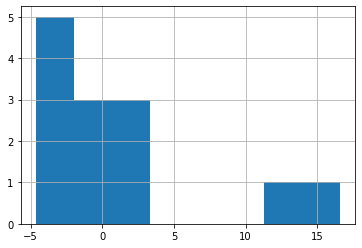

In [ ]:
pred = reg.predict(X_test)
err = pd.Series(Y_test["change_BTC"]) - [p[0]for p in pred]
err.hist(bins = 8)

In [ ]:
reg.score(X_test,Y_test)

0.708372106573206

Recency Model (after2020)

DV -> change_BTC

IVs -> ["change_DOGE","change_ETH","change_LTC","change_XLM", "change_BNB"]

coef, int -> [-0.01271835  0.13922775  0.4054446   0.08002305  0.06585447] 
[0.94818466]

R2 -> 0.75

In [ ]:
dateStandard = datetime.strptime("2019-01-01", "%Y-%d-%m")
RegMergedRecent2 = RegMerged.loc[RegMerged["Date"] >= dateStandard]

In [ ]:
RegMergedRecent2.corr()

,change_SP5,change_BTC,change_DOGE,change_ETH,change_LTC,change_XLM,change_BNB
change_SP5,1.000000,0.135857,0.015209,0.185460,0.194993,0.180767,0.136077
change_BTC,0.135857,1.000000,0.148798,0.759563,0.764548,0.506359,0.535908
change_DOGE,0.015209,0.148798,1.000000,0.220100,0.216390,0.156735,0.139150
change_ETH,0.185460,0.759563,0.220100,1.000000,0.812909,0.625000,0.526274
change_LTC,0.194993,0.764548,0.216390,0.812909,1.000000,0.536091,0.525301
change_XLM,0.180767,0.506359,0.156735,0.625000,0.536091,1.000000,0.428943
change_BNB,0.136077,0.535908,0.139150,0.526274,0.525301,0.428943,1.000000


In [ ]:
X = RegMergedRecent2[["change_ETH","change_LTC","change_XLM", "change_BNB"]]
Y = RegMergedRecent2[["change_BTC"]]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(pd.DataFrame(X_train),pd.DataFrame(Y_train))
print(reg.coef_)
print(reg.intercept_)

[[ 0.31008213  0.33101247 -0.00344091  0.04735637]]
[0.97664412]


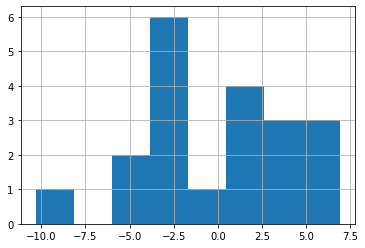

In [ ]:
pred = reg.predict(X_test)
err = pd.Series(Y_test["change_BTC"]) - [p[0]for p in pred]
err.hist(bins = 8)

Text(0.5, 1.0, 'Errors Hist')

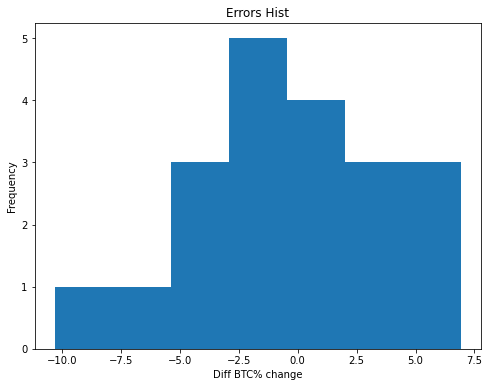

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.hist(err, label = "Errors", bins = 7)


plt.xlabel("Diff BTC% change")
plt.ylabel("Frequency")
plt.title("Errors Hist")

In [ ]:
reg.score(X_test,Y_test)

0.8958044916274408

Recency Model (after 2019)

DV -> change_BTC

IVs -> ["change_ETH","change_LTC","change_XLM", "change_BNB"]

coef, int -> [0.14590034 0.39675488 0.0586252  0.09015267]    [0.77216814]

R2 -> 0.76

In [ ]:
def BiWeeklyOutputs(data):
  data["Weekday"] = data["Date"].dt.day_name()
  weekly = data.loc[(data["Weekday"]=="Monday")|(data["Weekday"]=="Thursday")]
  weekly["change"] = (weekly["Adj Close"].pct_change())*100
  weekly.drop(["High","Low","Close","Volume","Weekday"], axis=1, inplace = True)
  return(weekly)

In [ ]:
LTCBiWeekly = BiWeeklyOutputs(LTC)
XLMBiWeekly = BiWeeklyOutputs(XLM)
BNBBiWeekly = BiWeeklyOutputs(BNB)
SP5BiWeekly = BiWeeklyOutputs(SP5)
BTCBiWeekly = BiWeeklyOutputs(BTC)
DOGEBiWeekly = BiWeeklyOutputs(DOGE)
ETHBiWeekly = BiWeeklyOutputs(ETH)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
SP5BiWeeklyReg = SP5BiWeekly[["Date","change"]]
SP5BiWeeklyReg.columns = ["Date", "change_SP5"]

BTCBiWeeklyReg = BTCBiWeekly[["Date","change"]]
BTCBiWeeklyReg.columns = ["Date", "change_BTC"]

DOGEBiWeeklyReg = DOGEBiWeekly[["Date","change"]]
DOGEBiWeeklyReg.columns =  ["Date", "change_DOGE"]

ETHBiWeeklyReg = ETHBiWeekly[["Date","change"]]
ETHBiWeeklyReg.columns = ["Date", "change_ETH"]

LTCBiWeeklyReg = LTCBiWeekly[["Date","change"]]
XLMBiWeeklyReg = XLMBiWeekly[["Date","change"]]
BNBBiWeeklyReg = BNBBiWeekly[["Date","change"]]

LTCBiWeeklyReg.columns = ["Date", "change_LTC"]
XLMBiWeeklyReg.columns = ["Date", "change_XLM"]
BNBBiWeeklyReg.columns = ["Date", "change_BNB"]



In [ ]:
BiMerged = SP5BiWeeklyReg.merge(BTCBiWeeklyReg, how = "inner", on="Date")
BiMerged = BiMerged.merge(DOGEBiWeeklyReg, how = "inner", on="Date")
BiMerged = BiMerged.merge(ETHBiWeeklyReg, how = "inner", on = "Date")
BiMerged = BiMerged.merge(LTCBiWeeklyReg, how = "inner", on = "Date")
BiMerged = BiMerged.merge(XLMBiWeeklyReg, how = "inner", on = "Date")
BiMerged = BiMerged.merge(BNBBiWeeklyReg, how = "inner", on = "Date")
BiMerged.dropna(inplace = True)

In [ ]:
dateStandard = datetime.strptime("2019-01-01", "%Y-%d-%m")
BiMergedRecent = BiMerged.loc[BiMerged["Date"] >= dateStandard]

In [ ]:
BiMergedRecent.corr()

,change_SP5,change_BTC,change_DOGE,change_ETH,change_LTC,change_XLM,change_BNB
change_SP5,1.000000,0.230323,0.056331,0.242632,0.242557,0.245619,0.211706
change_BTC,0.230323,1.000000,0.300792,0.747497,0.771128,0.575796,0.604544
change_DOGE,0.056331,0.300792,1.000000,0.372864,0.371917,0.350714,0.250726
change_ETH,0.242632,0.747497,0.372864,1.000000,0.785244,0.685043,0.547643
change_LTC,0.242557,0.771128,0.371917,0.785244,1.000000,0.603121,0.607494
change_XLM,0.245619,0.575796,0.350714,0.685043,0.603121,1.000000,0.479828
change_BNB,0.211706,0.604544,0.250726,0.547643,0.607494,0.479828,1.000000


In [ ]:
X = BiMergedRecent[["change_ETH","change_LTC", "change_BNB"]]
Y = BiMergedRecent[["change_BTC"]]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(pd.DataFrame(X_train),pd.DataFrame(Y_train))
print(reg.coef_)
print(reg.intercept_)

[[0.28248398 0.2919488  0.11695001]]
[0.19431249]


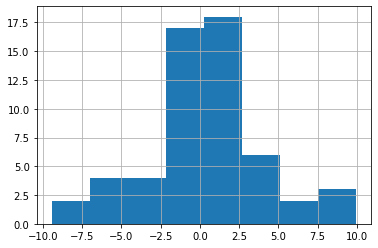

In [ ]:
pred = reg.predict(X_test)
err = pd.Series(Y_test["change_BTC"]) - [p[0]for p in pred]
err.hist(bins = 8)

Text(0.5, 1.0, 'Errors Hist')

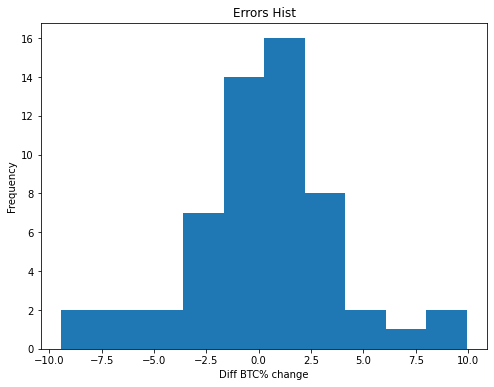

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.hist(err, label = "Errors", bins = 10)


plt.xlabel("Diff BTC% change")
plt.ylabel("Frequency")
plt.title("Errors Hist")

In [ ]:
reg.score(X_test,Y_test)

0.7862167529446666

In [ ]:
len(Y_train["change_BTC"])

222